# **PHÂN TÍCH VÀ MÔ HÌNH DỰ ĐOÁN GIÁ BIẾN ĐỘNG CỔ PHIẾU**

# Import các thư viện cần thiết

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import zipfile

# Đọc file và kết hợp file 4 công ty cổ phiếu (FPT, MSN, PNJ, VIC) thành một file companies_stock.csv

In [ ]:
df_list = []

# Mở file zip
with zipfile.ZipFile('/content/drive/MyDrive/Finpros_Stock/Finpros-Companies-Stock.zip', 'r') as zip:

    # Lặp qua các file csv trong file zip
    for file in zip.namelist():

        # Đọc file csv
        df = pd.read_csv(zip.open(file))

        # Thêm file csv đã đọc vào danh sách
        df_list.append(df)

    # Nối các file csv trong danh sách
    df_merged = pd.concat(df_list)

    # Lưu file csv đã nối
    df_merged.to_csv('/content/drive/MyDrive/Finpros_Stock/companies_stock.csv', index=False)



# Đọc file

In [4]:
companies = pd.read_csv('/content/drive/MyDrive/Finpros_Stock/companies_stock.csv')
companies.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


# Kiểm tra đã đọc đủ dữ liệu hay chưa

In [ ]:
print('Number of sample FPT: ',len(companies[companies['Ticker'] == 'FPT']))
print('Number of sample MSN: ',len(companies[companies['Ticker'] == 'MSN']))
print('Number of sample PNJ: ',len(companies[companies['Ticker'] == 'PNJ']))
print('Number of sample VIC: ',len(companies[companies['Ticker'] == 'VIC']))

Number of sample FPT:  97406
Number of sample MSN:  135354
Number of sample PNJ:  125309
Number of sample VIC:  101266


# Thống kê tóm tắt dữ liệu

In [ ]:
# Thống kê tóm tắt
companies.describe()

,Open,High,Low,Close,Volume,Open Interest
count,459335.000000,459335.000000,459335.000000,459335.000000,4.593350e+05,459335.0
mean,74.545826,74.626579,74.481065,74.546183,4.909390e+03,0.0
std,23.023346,23.038201,23.011619,23.024380,1.902104e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+00,0.0
25%,54.190000,54.250000,54.150000,54.190000,3.600000e+02,0.0
50%,75.730000,75.920000,75.600000,75.720000,1.500000e+03,0.0
75%,90.100000,90.200000,90.000000,90.100000,4.920000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,3.300680e+06,0.0


# Xem các thông tin về dữ liệu

In [ ]:
# Thông tin chung về dữ liệu
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459335 entries, 0 to 459334
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         459335 non-null  object 
 1   Date/Time      459335 non-null  object 
 2   Open           459335 non-null  float64
 3   High           459335 non-null  float64
 4   Low            459335 non-null  float64
 5   Close          459335 non-null  float64
 6   Volume         459335 non-null  int64  
 7   Open Interest  459335 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 28.0+ MB


# Chuyển đổi Date/Time thành kiểu thời gian

In [5]:
# Chuyển đổi kiểu dữ liệu của trường Date/Time từ object sang datetime64[ns]
companies['Date/Time'] = pd.to_datetime(companies['Date/Time'])
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459335 entries, 0 to 459334
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         459335 non-null  object        
 1   Date/Time      459335 non-null  datetime64[ns]
 2   Open           459335 non-null  float64       
 3   High           459335 non-null  float64       
 4   Low            459335 non-null  float64       
 5   Close          459335 non-null  float64       
 6   Volume         459335 non-null  int64         
 7   Open Interest  459335 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 28.0+ MB


In [ ]:
companies

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
459330,VIC,2020-12-22 14:22:00,105.80,105.80,105.70,105.70,1870,0
459331,VIC,2020-12-22 14:23:00,105.70,105.70,105.70,105.70,2510,0
459332,VIC,2020-12-22 14:24:00,105.70,105.70,105.70,105.70,3620,0
459333,VIC,2020-12-22 14:25:00,105.70,105.70,105.70,105.70,100,0


## Closing Price (Giá đóng cửa / Giá cuối ngày)

Giá đóng cửa là mức giá cuối cùng mà cổ phiếu được giao dịch trong ngày giao dịch thông thường. Giá đóng cửa của cổ phiếu là tiêu chuẩn chuẩn được các nhà đầu tư sử dụng để theo dõi hiệu suất của nó theo thời gian.


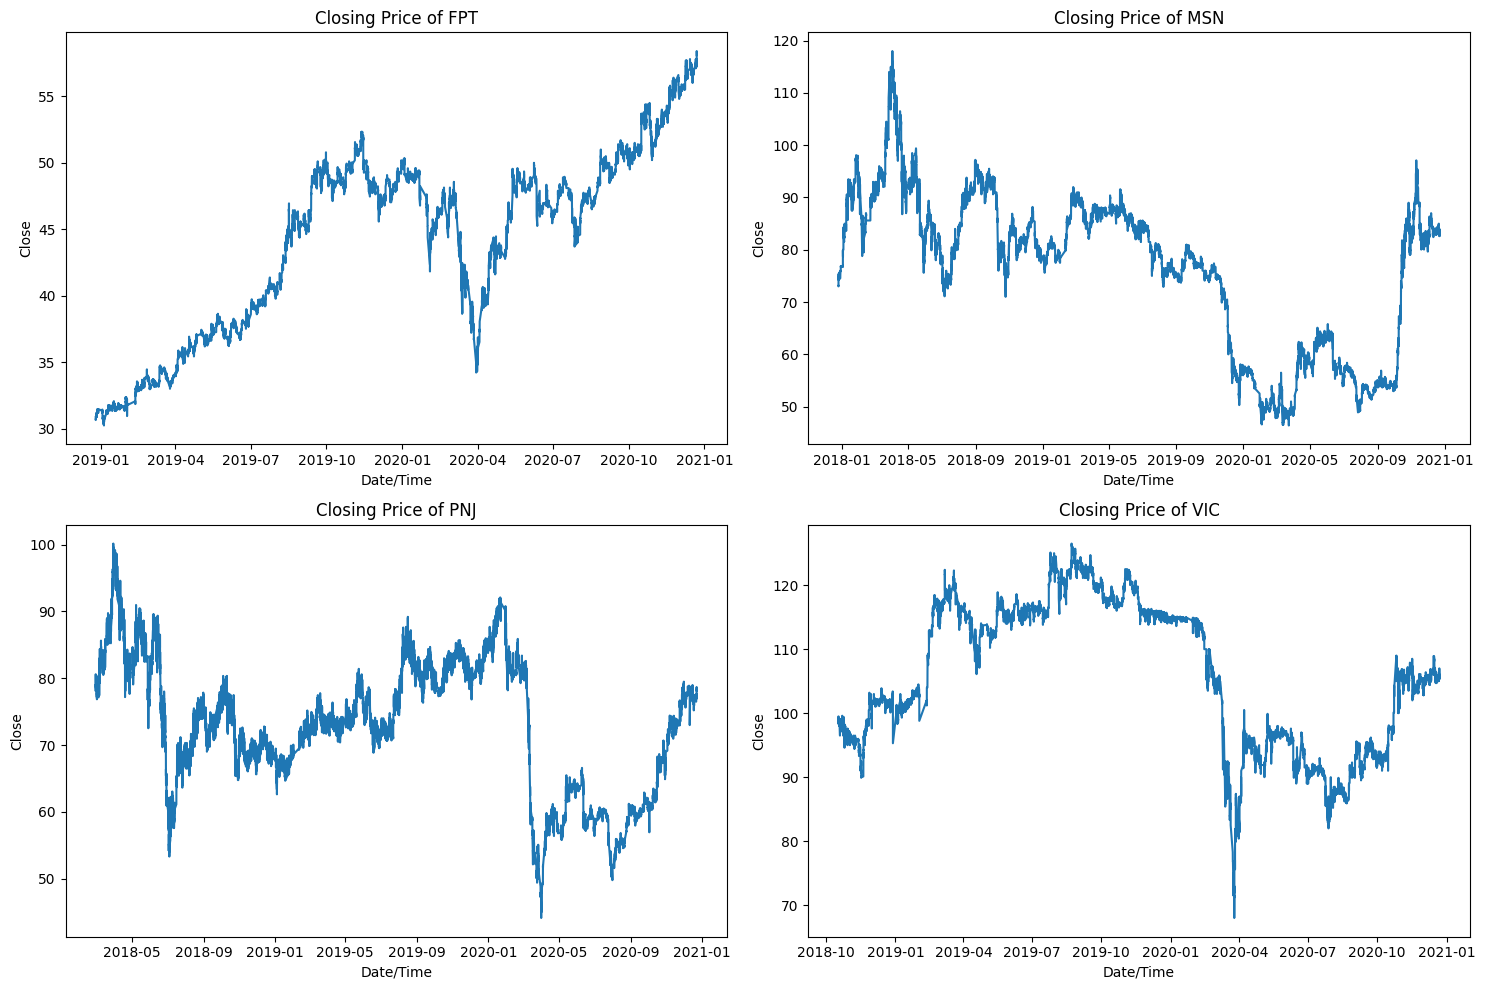

In [ ]:
# Xem lịch sử của giá đóng cửa
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

company_list = companies['Ticker'].unique()

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  df_company = companies[companies['Ticker'] == company_list[i - 1]]
  plt.plot(df_company['Date/Time'], df_company['Close'])
  plt.ylabel('Close')
  plt.xlabel('Date/Time')
  plt.title(f"Closing Price of {company}")


plt.tight_layout()

## Volume of Sales (Khối lượng giao dịch)
Volume là số lượng tài sản hoặc chứng khoán được trao tay trong một khoảng thời gian, thường là trong một ngày. Ví dụ: khối lượng giao dịch chứng khoán sẽ đề cập đến số lượng cổ phiếu chứng khoán được giao dịch giữa thời điểm mở cửa và đóng cửa hàng ngày. Khối lượng giao dịch và những thay đổi về khối lượng theo thời gian là những thông tin đầu vào quan trọng đối với các nhà giao dịch kỹ thuật (technical traders).

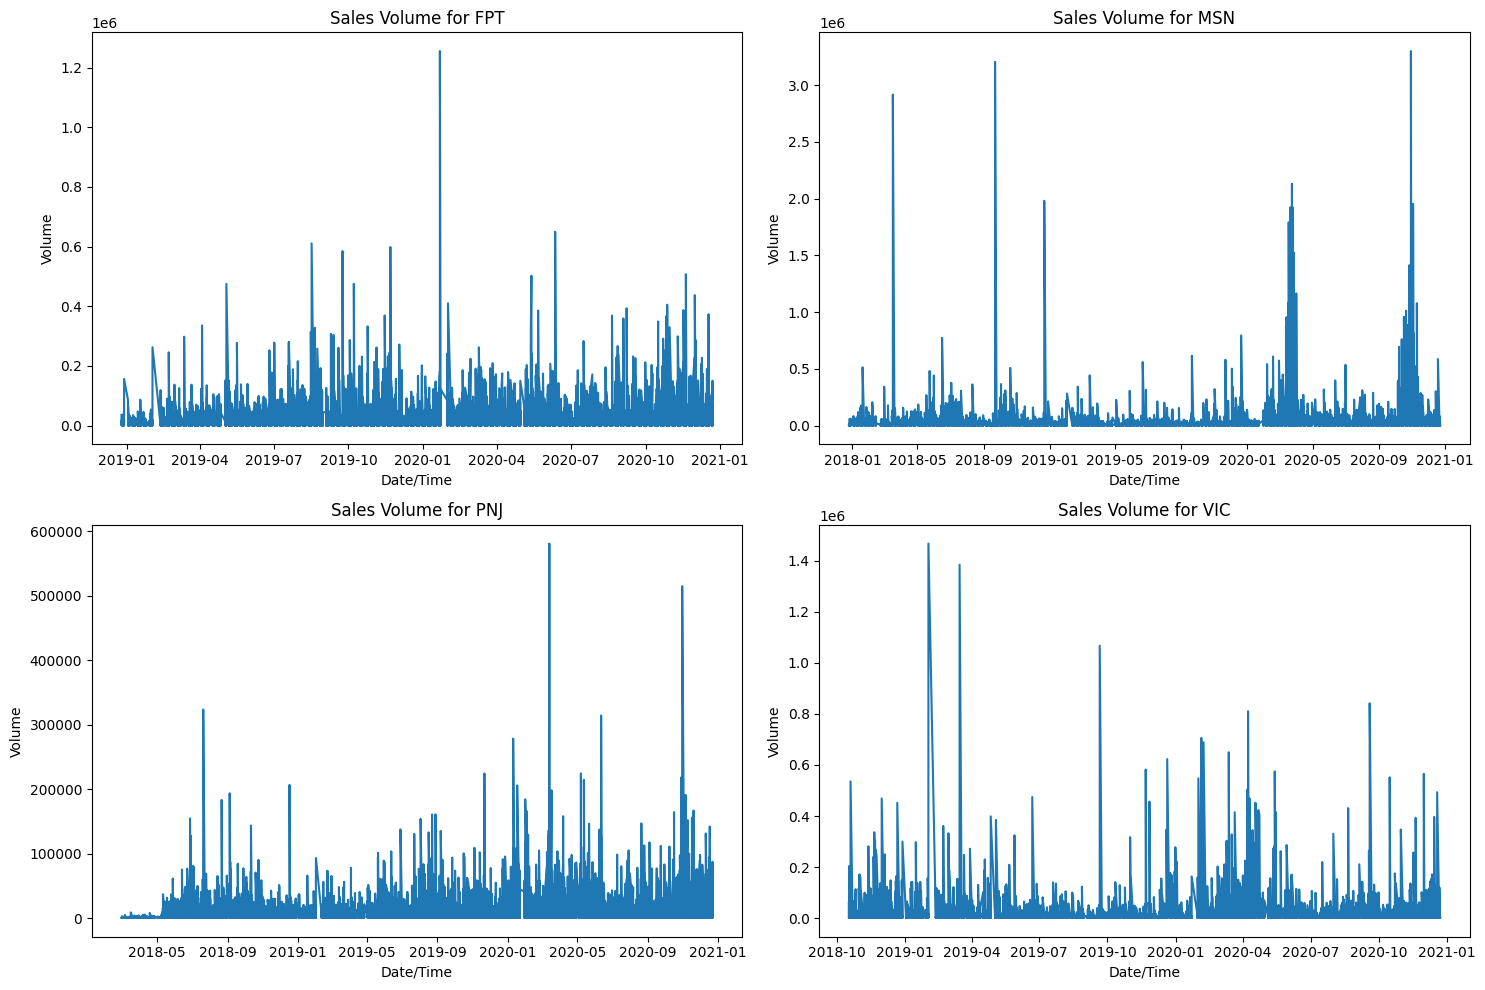

In [ ]:
# Xem lịch sử của giá đóng cửa
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

company_list = companies['Ticker'].unique()

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  df_company = companies[companies['Ticker'] == company_list[i - 1]]
  plt.plot(df_company['Date/Time'], df_company['Volume'])
  plt.ylabel('Volume')
  plt.xlabel('Date/Time')
  plt.title(f"Sales Volume for {company}")

plt.tight_layout()

## The moving average (Trung bình trượt / Trung bình động)
Trung bình động (MA) là một công cụ phân tích kỹ thuật đơn giản giúp làm mịn dữ liệu giá bằng cách tạo ra mức giá trung bình được cập nhật liên tục. Mức trung bình được lấy trong một khoảng thời gian cụ thể, như 5 ngày, 10 phút, 20 tuần hoặc bất kỳ khoảng thời gian nào mà nhà giao dịch chọn.

In [ ]:
# Tính trung bình trượt cho từng công ty và cửa sổ trượt 5, 10, 25 ngày
company_list = companies['Ticker'].unique()
ma_days = [7200, 14400, 36000]

for ma in ma_days:
    for company in company_list:
        column_name = f'MA for {pd.Timedelta(minutes=ma).days} days'
        companies.loc[companies['Ticker'] == company, column_name] = companies.loc[companies['Ticker'] == company, 'Close'].rolling(ma).mean()

companies

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,MA for 5 days,MA for 10 days,MA for 25 days
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0,NaN,NaN,NaN
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,NaN,NaN,NaN
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,NaN,NaN,NaN
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,NaN,NaN,NaN
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
459330,VIC,2020-12-22 14:22:00,105.80,105.80,105.70,105.70,1870,0,105.218764,101.034139,95.750797
459331,VIC,2020-12-22 14:23:00,105.70,105.70,105.70,105.70,2510,0,105.219014,101.035181,95.751114
459332,VIC,2020-12-22 14:24:00,105.70,105.70,105.70,105.70,3620,0,105.219250,101.036222,95.751433
459333,VIC,2020-12-22 14:25:00,105.70,105.70,105.70,105.70,100,0,105.219569,101.037264,95.751750


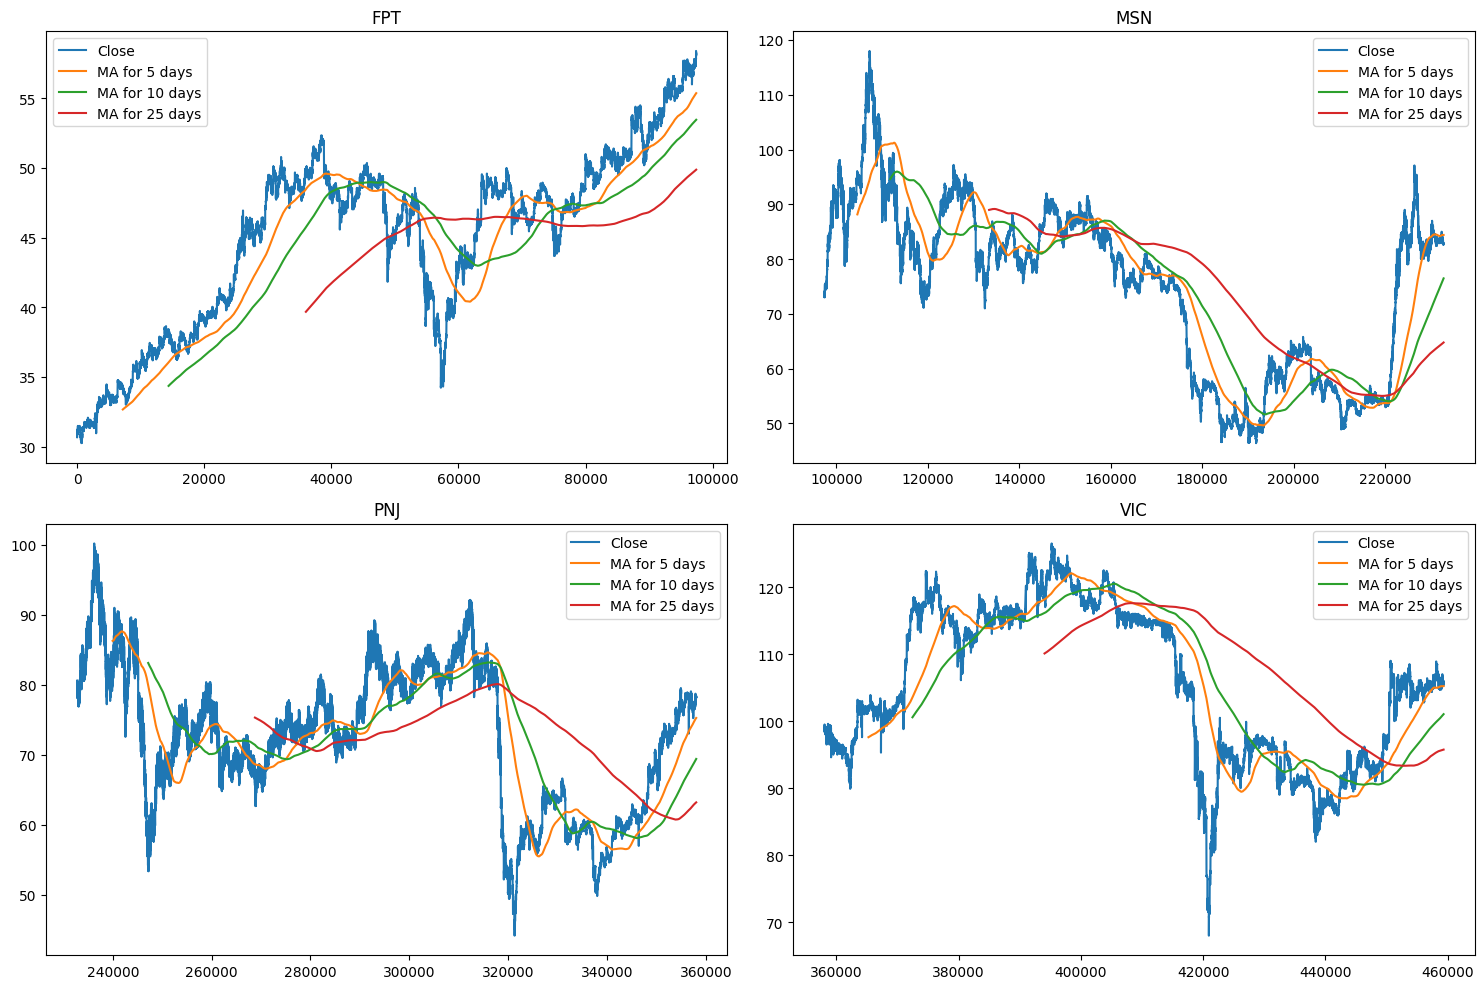

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

companies[companies['Ticker'] == company_list[0]][['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 25 days']].plot(ax=axes[0,0])
axes[0,0].set_title('FPT')
companies[companies['Ticker'] == company_list[1]][['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 25 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MSN')
companies[companies['Ticker'] == company_list[2]][['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 25 days']].plot(ax=axes[1,0])
axes[1,0].set_title('PNJ')
companies[companies['Ticker'] == company_list[3]][['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 25 days']].plot(ax=axes[1,1])
axes[1,1].set_title('VIC')

fig.tight_layout()

### **Chúng ta có thể thấy trong biểu đồ rằng các giá trị tốt nhất để đo đường trung bình động là 5 và 10 ngày vì chúng ta vẫn nắm bắt được xu hướng trong dữ liệu mà không bị nhiễu.**


---



# **The correlation between different stocks closing prices**
Mối tương quan giữa giá đóng cửa (giá cuối ngày) của các cổ phiếu khác nhau

In [ ]:
closing_df = companies[['Date/Time','Ticker','Close']]
tech_rets = closing_df.pivot(index='Date/Time', columns='Ticker', values='Close').pct_change()
tech_rets.head()

Ticker,FPT,MSN,PNJ,VIC
Date/Time,,,,
2017-12-25 09:15:00,NaN,NaN,NaN,NaN
2017-12-25 09:16:00,NaN,-0.001368,NaN,NaN
2017-12-25 09:18:00,NaN,0.006849,NaN,NaN
2017-12-25 09:20:00,NaN,-0.005442,NaN,NaN
2017-12-25 09:21:00,NaN,-0.001368,NaN,NaN


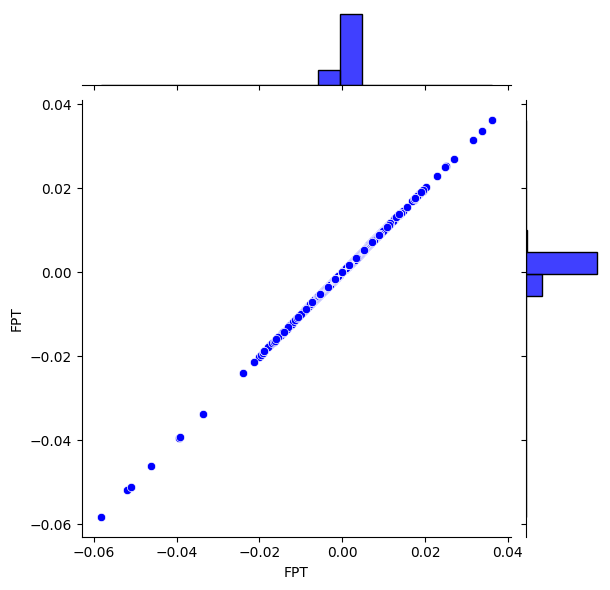

In [ ]:
# So sánh FPT với chính nó sẽ cho thấy mối quan hệ tuyến tính hoàn hảo (linear relationship)
sns.jointplot(x='FPT', y='FPT', data=tech_rets, kind='scatter', color='blue')

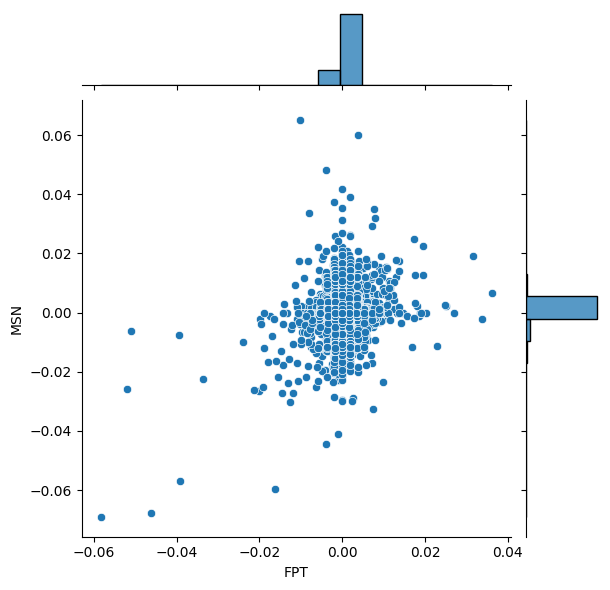

In [ ]:
# So sánh lợi nhuận hàng phút của FPT và MSN
sns.jointplot(x='FPT', y='MSN', data=tech_rets, kind='scatter')

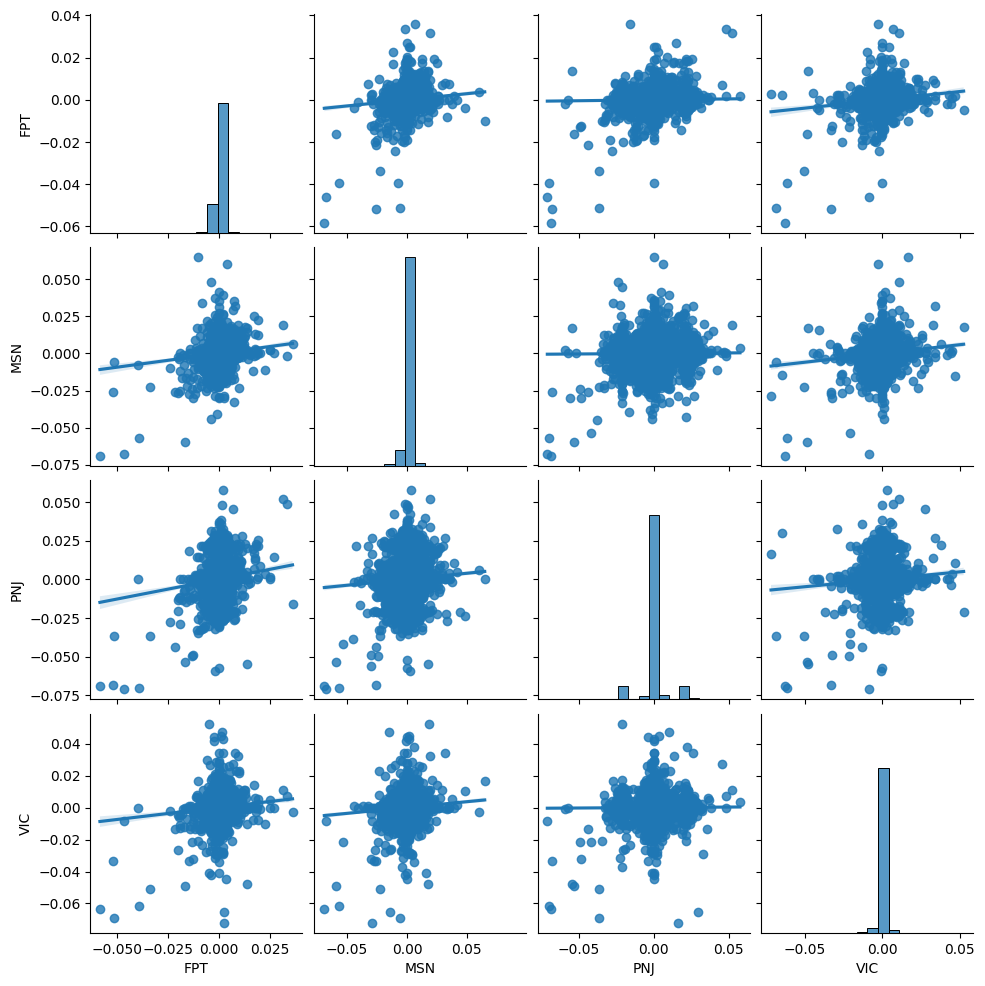

In [ ]:
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Tương quan giá đóng cửa cổ phiếu')

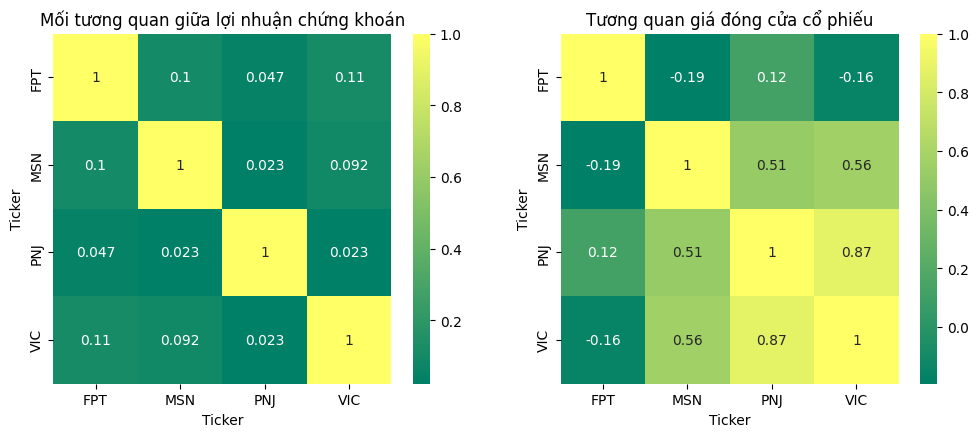

In [ ]:
closing_df = closing_df.pivot(index='Date/Time', columns='Ticker', values='Close')

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Mối tương quan giữa lợi nhuận chứng khoán')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Tương quan giá đóng cửa cổ phiếu')

Chúng ta thấy ở đây một cách trực quan và bằng số rằng không có mối tương quan mạnh nào về lợi nhuận chứng khoán hàng phút của các công ty.

# **Tính rủi ro khi đầu tư vào một cổ phiếu cụ thể**
Có nhiều cách để chúng ta có thể định lượng rủi ro, một trong những cách cơ bản nhất bằng cách sử dụng thông tin chúng ta có được về tỷ suất sinh lợi hàng phút là so sánh lợi nhuận kỳ vọng (expected return) với độ lệch chuẩn (standard deviation) của lợi nhuận hàng phút.

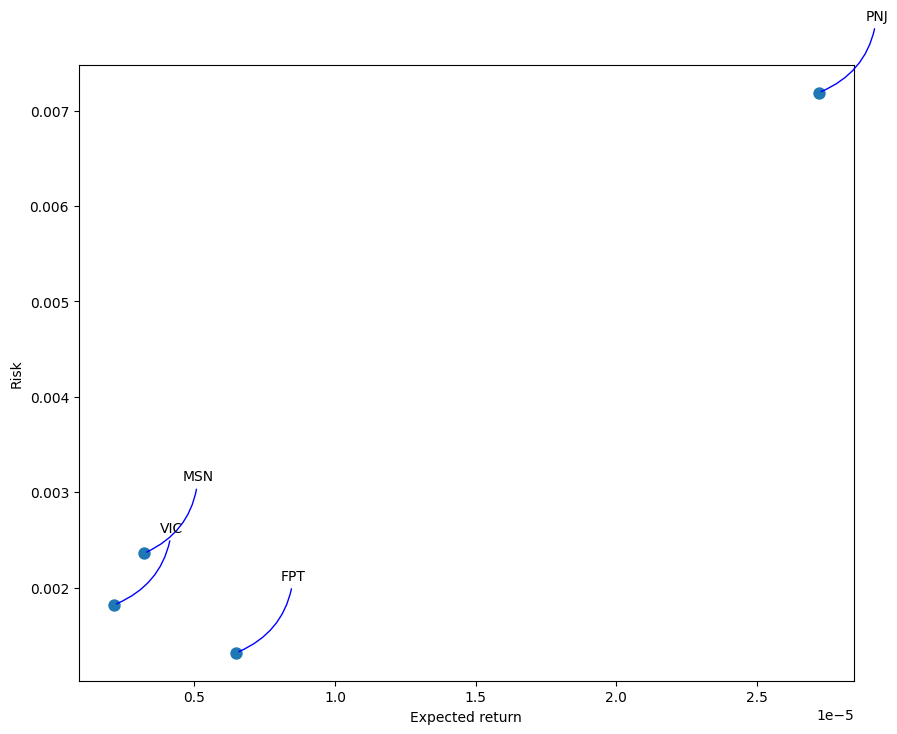

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

#  **Dự đoán giá đóng cửa giá cổ phiếu của FPT**

In [19]:
df_fpt = companies[companies['Ticker'] == 'FPT']
df_fpt.set_index('Date/Time', inplace=True)
df_fpt

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2018-12-25 09:15:00,FPT,30.89,30.89,30.89,30.89,35410,0
2018-12-25 09:16:00,FPT,30.81,30.81,30.81,30.81,190,0
2018-12-25 09:17:00,FPT,30.74,30.81,30.74,30.74,1120,0
2018-12-25 09:18:00,FPT,30.74,30.74,30.74,30.74,2120,0
2018-12-25 09:19:00,FPT,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...
2020-12-22 14:24:00,FPT,58.20,58.20,58.20,58.20,27470,0
2020-12-22 14:25:00,FPT,58.20,58.20,58.20,58.20,14820,0
2020-12-22 14:26:00,FPT,58.20,58.20,58.20,58.20,500,0


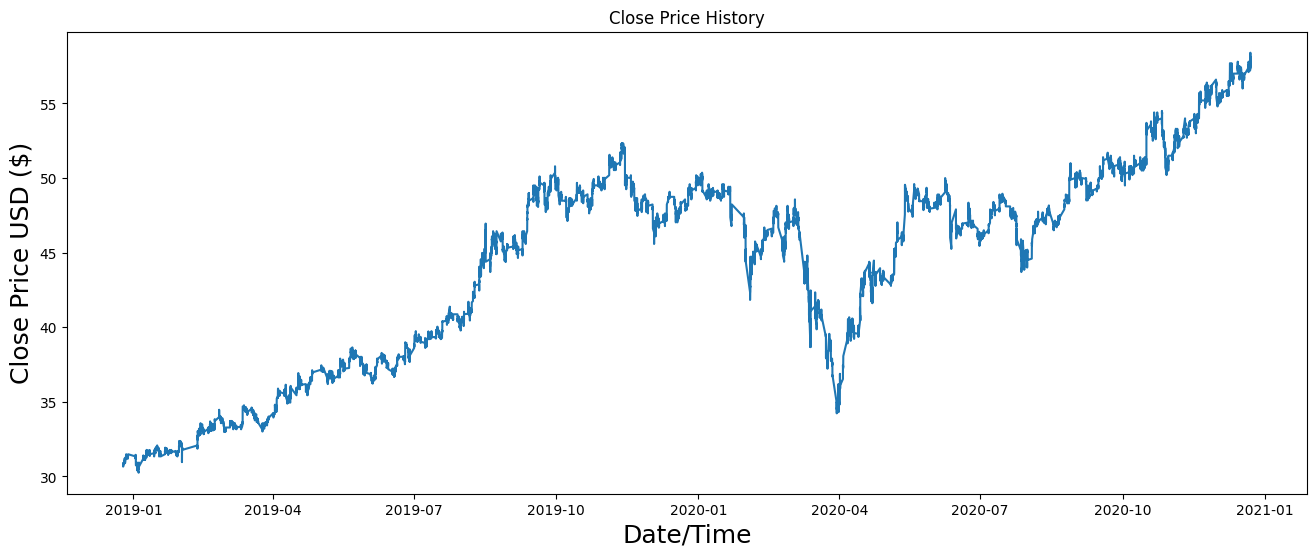

In [23]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_fpt.index, df_fpt['Close'])
plt.xlabel('Date/Time', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
data = df_fpt.filter(['Close'])
# Chuyển đổi mảng df_fpt thành mảng numpy
dataset = data.values
# Lấy số dòng để train mô hình
training_data_len = int(np.ceil(len(dataset) * .95 ))

training_data_len

92536

In [25]:
# Chia tỉ lệ dữ liệu
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02273535],
       [0.01989343],
       [0.01740675],
       ...,
       [0.9928952 ],
       [0.98934281],
       [0.98934281]])

In [26]:
# Tạo tập dữ liệu training theo tỷ lệ
train_data = scaled_data[0:int(training_data_len), :]
# Chia dữ liệu thành các tập dữ liệu x_train và y_train

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Chuyển đổi x_train và y_train thành mảng numpy
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape dữ liệu
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.02273535, 0.01989343, 0.01740675, 0.01740675, 0.01740675,
       0.01740675, 0.01456483, 0.03055062, 0.03339254, 0.03339254,
       0.03197158, 0.03055062, 0.03055062, 0.03055062, 0.03339254,
       0.03339254, 0.03055062, 0.03445826, 0.03445826, 0.02806394,
       0.02806394, 0.02522202, 0.02522202, 0.02522202, 0.02522202,
       0.02273535, 0.02273535, 0.02522202, 0.02273535, 0.02273535,
       0.02522202, 0.02522202, 0.02806394, 0.03339254, 0.03055062,
       0.03197158, 0.03197158, 0.03055062, 0.03055062, 0.03055062,
       0.03055062, 0.03339254, 0.03339254, 0.03339254, 0.03055062,
       0.03055062, 0.03055062, 0.03055062, 0.03055062, 0.03197158,
       0.03197158, 0.03055062, 0.03197158, 0.03055062, 0.03197158,
       0.03055062, 0.03055062, 0.03055062, 0.03055062, 0.03055062])]
[0.03197158081705154]

[array([0.02273535, 0.01989343, 0.01740675, 0.01740675, 0.01740675,
       0.01740675, 0.01456483, 0.03055062, 0.03339254, 0.03339254,
       0.03197158, 0.03055062, 0.03

(92476, 60, 1)

# Xây dựng và train mô hình dự đoán

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Train mô hình
model.fit(x_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
2890/2890 [==============================] - 348s 119ms/step - loss: 2.3981e-04
Epoch 2/30
2890/2890 [==============================] - 305s 105ms/step - loss: 2.5524e-05
Epoch 3/30
2890/2890 [==============================] - 305s 106ms/step - loss: 1.7927e-05
Epoch 4/30
2890/2890 [==============================] - 308s 106ms/step - loss: 1.2781e-05
Epoch 5/30
2890/2890 [==============================] - 305s 106ms/step - loss: 1.1311e-05
Epoch 6/30
2890/2890 [==============================] - 324s 112ms/step - loss: 1.0569e-05
Epoch 7/30
2890/2890 [==============================] - 330s 114ms/step - loss: 9.1634e-06
Epoch 8/30
2890/2890 [==============================] - 317s 110ms/step - loss: 9.7767e-06
Epoch 9/30
2890/2890 [==============================] - 309s 107ms/step - loss: 8.6466e-06
Epoch 10/30
2890/2890 [==============================] - 304s 105ms/step - loss: 8.6807e-06
Epoch 11/30
2890/2890 [==============================] - 308s 106ms/step - loss: 8.4587e-

# Lưu mô hình

In [ ]:
model.save('/content/drive/MyDrive/Finpros_Stock/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Tải mô hình

In [1]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Finpros_Stock/model.h5')

In [27]:
test_data = scaled_data[training_data_len - 60: , :]
# Tạo tập dữ liệu x_test và y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Chuyển đổi dữ liệu thành một mảng numpy
x_test = np.array(x_test)

# Reshape dữ liệu
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Các mô hình giá trị dự đoán
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE) (Lấy lỗi bình phương trung bình gốc)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

153/153 [==============================] - 5s 34ms/step


0.17842815301091994

*   Nếu RMSE gần với 0, mô hình có khả năng dự đoán giá cổ phiếu rất tốt.
*   Nếu RMSE tăng lên, mức độ lỗi tăng, và mô hình có xu hướng kém đối với dữ liệu thử nghiệm.

<ipython-input-28-438178819be1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


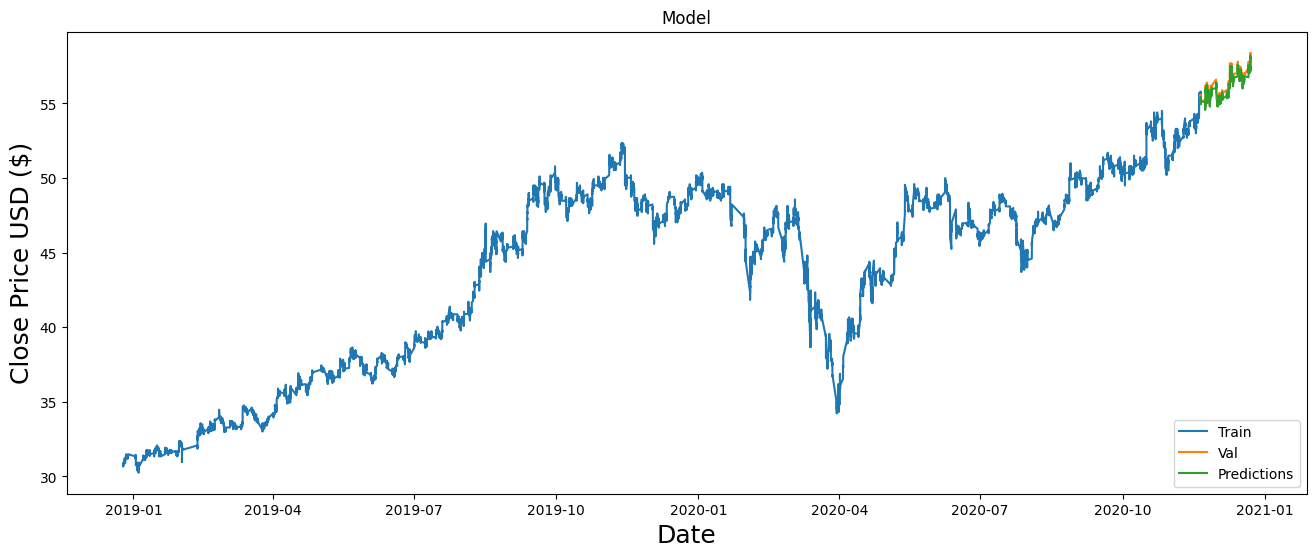

In [28]:
# Vẽ dữ liệu
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [29]:
# Hiển thị giá hợp lệ và dự đoán
valid

,Close,Predictions
Date/Time,,
2020-11-20 09:35:00,55.4,55.257118
2020-11-20 09:36:00,55.4,55.252506
2020-11-20 09:37:00,55.4,55.250866
2020-11-20 09:38:00,55.3,55.250221
2020-11-20 09:39:00,55.3,55.178391
...,...,...
2020-12-22 14:24:00,58.2,57.980629
2020-12-22 14:25:00,58.2,57.999382
2020-12-22 14:26:00,58.2,58.004662


# Dự đoán biến động giá cổ phiếu của công ty FPT theo thời gian thực trên Yahoo Finance

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
48/48 - 3s - loss: 0.1229 - 3s/epoch - 52ms/step
Epoch 2/50
48/48 - 0s - loss: 0.0072 - 475ms/epoch - 10ms/step
Epoch 3/50
48/48 - 0s - loss: 0.0063 - 481ms/epoch - 10ms/step
Epoch 4/50
48/48 - 0s - loss: 0.0057 - 453ms/epoch - 9ms/step
Epoch 5/50
48/48 - 0s - loss: 0.0050 - 449ms/epoch - 9ms/step
Epoch 6/50
48/48 - 0s - loss: 0.0046 - 470ms/epoch - 10ms/step
Epoch 7/50
48/48 - 0s - loss: 0.0045 - 452ms/epoch - 9ms/step
Epoch 8/50
48/48 - 0s - loss: 0.0041 - 484ms/epoch - 10ms/step
Epoch 9/50
48/48 - 0s - loss: 0.0037 - 475ms/epoch - 10ms/step
Epoch 10/50
48/48 - 0s - loss: 0.0036 - 491ms/epoch - 10ms/step
Epoch 11/50
48/48 - 0s - loss: 0.0033 - 473ms/epoch - 10ms/step
Epoch 12/50
48/48 - 1s - loss: 0.0031 - 669ms/epoch - 14ms/step
Epoch 13/50
48/48 - 1s - loss: 0.0032 - 675ms/epoch - 14ms/step
Epoch 14/50
48/48 - 1s - loss: 0.0031 - 700ms/epoch - 15ms/step
Epoch 15/50
48/48 - 1s - loss: 0.0028 - 709ms/epoc

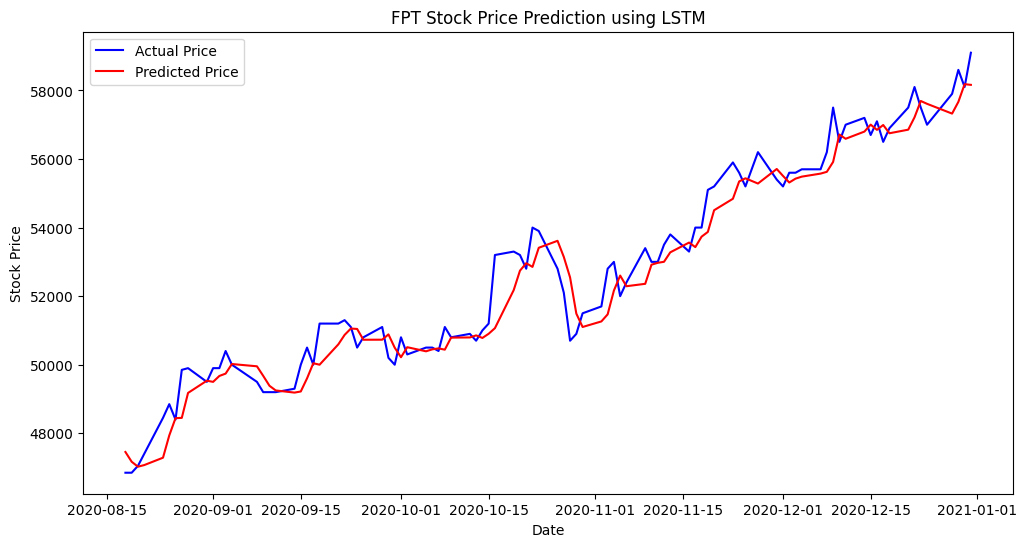

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

# Hàm để lấy dữ liệu giá cổ phiếu từ Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Hàm để chuẩn hóa dữ liệu và tạo dữ liệu đầu vào cho mô hình
def prepare_data(data, n_steps):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    x, y = [], []
    for i in range(len(scaled_data) - n_steps):
        x.append(scaled_data[i:i+n_steps, 0])
        y.append(scaled_data[i+n_steps, 0])

    x, y = np.array(x), np.array(y)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))

    return x, y, scaler

# Hàm để tạo mô hình LSTM
def create_lstm_model(n_steps):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Hàm để dự đoán giá cổ phiếu và vẽ biểu đồ
def predict_stock_price(model, x_test, scaler, original_data):
    predicted_data = model.predict(x_test)
    predicted_data = scaler.inverse_transform(predicted_data)

    mse = mean_squared_error(original_data['Close'].values[-len(predicted_data):], predicted_data)
    print(f'Mean Squared Error: {mse}')

    plt.figure(figsize=(12, 6))
    plt.plot(original_data.index[-len(predicted_data):], original_data['Close'].values[-len(predicted_data):], label='Actual Price', color='blue')
    plt.plot(original_data.index[-len(predicted_data):], predicted_data, label='Predicted Price', color='red')
    plt.title('FPT Stock Price Prediction using LSTM')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Thông tin cổ phiếu và khoảng thời gian
ticker = 'FPT'
start_date = '2019-01-01'
end_date = '2021-01-01'
n_steps = 30  # số bước thời gian quan sát

# Lấy dữ liệu cổ phiếu
stock_data = get_stock_data(ticker, start_date, end_date)

# Chuẩn bị dữ liệu cho mô hình
x, y, scaler = prepare_data(stock_data, n_steps)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Tạo và huấn luyện mô hình LSTM
model = create_lstm_model(n_steps)
model.fit(x_train, y_train, epochs=50, batch_size=8, verbose=2)

# Dự đoán giá cổ phiếu và vẽ biểu đồ
predict_stock_price(model, x_test, scaler, stock_data.iloc[train_size+n_steps:])
